# Centre Universitaire de Mila

## Master 1 (STIC & I2A), Matière: Apprentissage Automatique

## Travaux pratiques N°3 : Arbres de décision

## Enoncé

L’ensemble d’apprentissage est IRIS. Cet ensemble possède 3 classes K=3 (3 espèces de la fleur d’Iris).

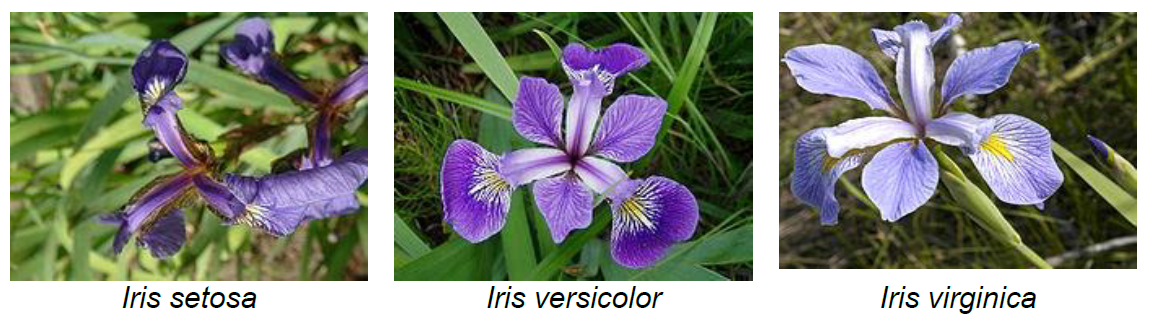

50 échantillons de chacune des 3 espèces ont été collectés. (N=150). On a mesuré la longueur et la largeur des sépales et pétales, respectivement.

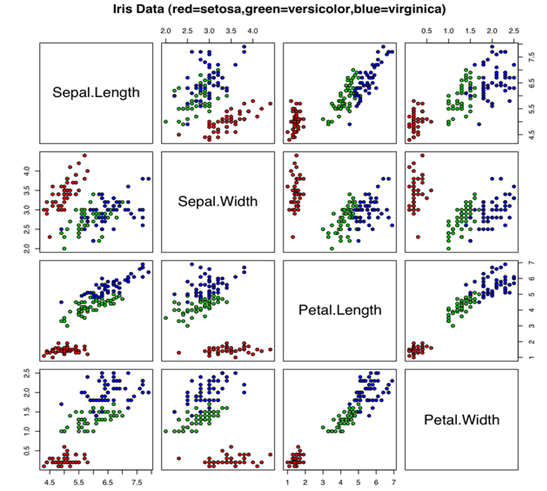

1) Les données sont sauvegardées sous format Excel. Utiliser les fonctions Python pour lire le dataset à partir de sklearn.datasets ou à partir du fichier Excel.

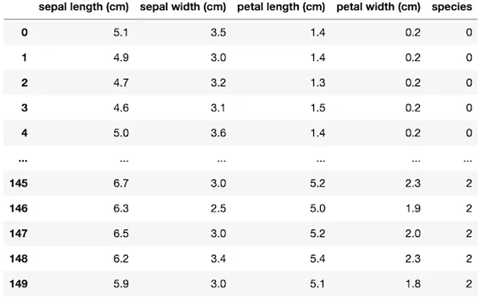

2) Séparer les données en: entrées (les attributs) et sorties (cibles). Dans ce fichier, les classes (qui sont le résultat attendu) sont dans la dernière colonne, et les autres caractéristiques (les entrées) sont dans les colonnes restantes.
3) Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test.
4) Générer un arbre de décision pour le problème cité en utilisant Python. Vous pouvez utiliser la classe DecisionTreeClassifier ou choisir une autre implémentation en citant la référence.
5) Valider le classificateur implémenté afin d’estimer la précision avec laquelle le classificateur ou le modèle peut prédire le type de fleurs.
6) Afficher et exporter l’arbre sous forme graphique et texte.

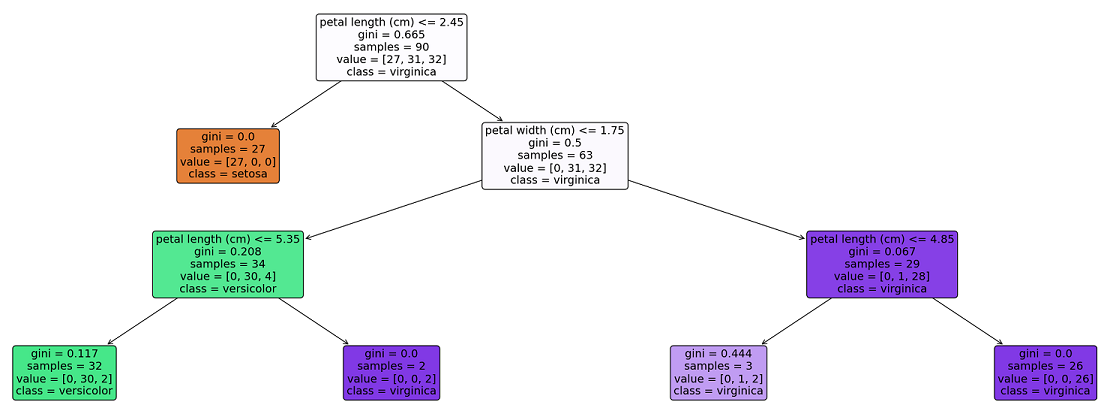

## Solution

### 1) Charger les bibliothèques :
Commençons par charger les bibliothèques requises.

In [1]:
import ... as pd
import ... as np
from ... import load_iris

### 2) Chargement des données :
Charger le jeu de données iris requis à l'aide de la fonction load_iris et de la fonction DataFrame de panda.

In [4]:
# load dataset
data = ...

#convert to a dataframe
df = pd.DataFrame(..., ...)

#create the species column
df['Species'] = ...

#replace this with the actual names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

In [5]:
...

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### 3) Sélection des caractéristiques (Feature Selection) :
Ici, vous devez diviser les colonnes données en deux types: (i) variables cibles et (ii) variables caractéristiques.

In [6]:
#extract features and target variables
x = df.drop(columns="Species")
y = df["Species"]

#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

### 4) Partitionnement des données :
Pour comprendre les performances du modèle, diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test est une bonne stratégie.

Séparons le jeu de données en utilisant la fonction train_test_split(). Vous devez passer trois paramètres ; ensemble d'apprentissage, la cible et la taille de l'ensemble test.

In [7]:
#split the dataset
from sklearn.model_selection import ...
x_train, x_test, y_train, y_test = ...

### 5) Élaboration d'un modèle d'arbre de décision :

Créons un modèle d'arbre de décision à l'aide de Scikit-learn.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = ...

# Train Decision Tree Classifer
clf.fit(....)

# Predict results for the test dataset
predicted = clf.predict(....)

print(...)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'versicolor']


### 6) Évaluation du modèle :
Estimons avec quelle précision le classificateur ou le modèle peut prédire le type de fleurs.
La précision peut être calculée en comparant les valeurs réelles de l'ensemble de test et les valeurs prédites.

In [9]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(..., ...)
print(f'Accuracy: {...}')

Accuracy: 0.9833333333333333


### 7) Visualisation des arbres de décision :
Vous pouvez utiliser la fonction plot_tree de Scikit-learn pour afficher l'arborescence dans un notebook Jupyter.

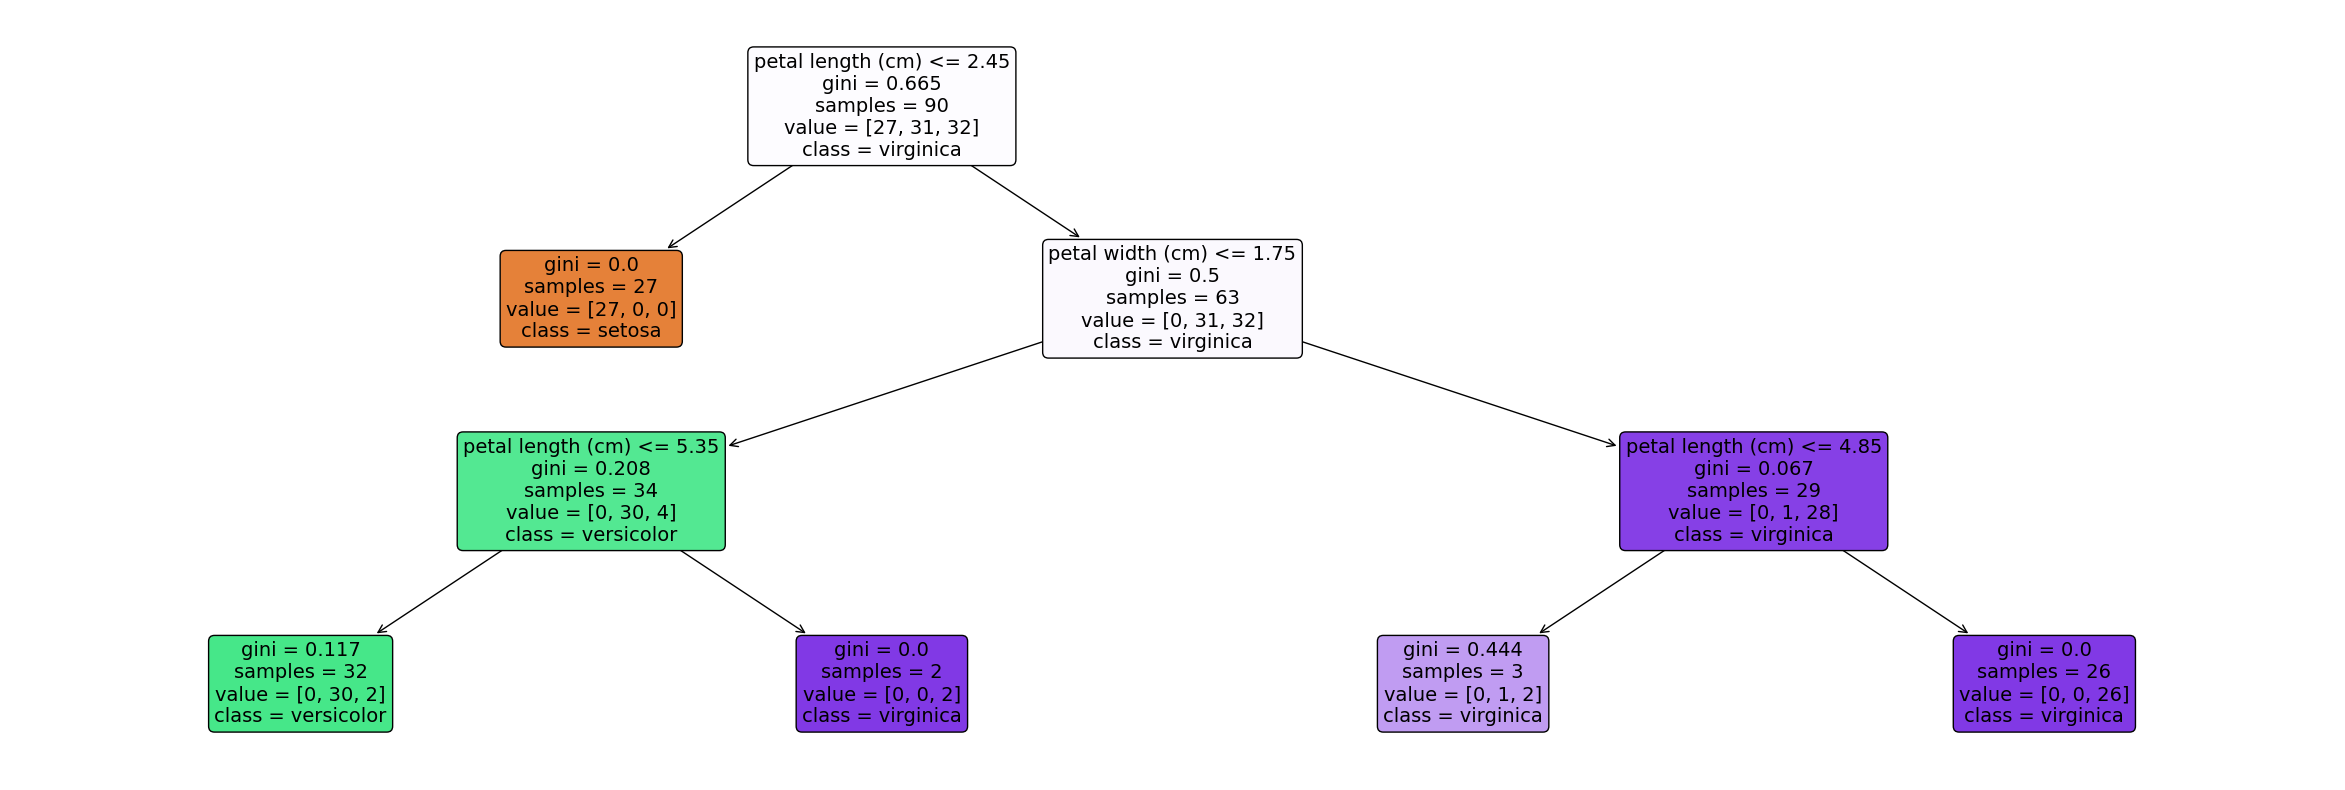

In [11]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')

#create the tree plot
a = tree.plot_tree(...,
                   #use the feature names stored
                   feature_names = ...,
                   #use the class names stored
                   class_names = ...,
                   rounded = True,
                   filled = True,
                   fontsize=14)

#show the plot
plt.show()

### 8) Sous forme de diagramme textuel :

In [12]:
#import relevant functions
from sklearn.tree import export_text

#export the decision rules
tree_rules = ...(clf, feature_names = list(feature_names))

#print the result
print(...)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica

